In [14]:
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath('..'))

from src.mnist_classifier import MnistClassifier

In [15]:
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [16]:
# Split the full training data into training and validation sets (e.g., 10% for validation)
val_split = 0.1
n_train = int((1 - val_split) * X_train_full.shape[0])
X_train, X_val = X_train_full[:n_train], X_train_full[n_train:]
y_train, y_val = y_train_full[:n_train], y_train_full[n_train:]

In [17]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (54000, 28, 28)
Validation set shape: (6000, 28, 28)
Test set shape: (10000, 28, 28)


##### Random Forest

In [18]:
# For Random Forest, we don't need to provide an input shape.
classifier_rf = MnistClassifier(algorithm='rf')

In [19]:
# Train the Random Forest model using the training and validation data.
classifier_rf.train(X_train, y_train, X_val, y_val)

Validation Accuracy: 0.9753


In [20]:
# Predict labels on the test set
predictions_rf = classifier_rf.predict(X_test)

In [21]:
# Evaluate the model's accuracy on the test set.
test_accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

Random Forest Test Accuracy: 0.9691


In [22]:
# Optionally, validate the model on the validation set separately.
val_accuracy_rf = classifier_rf.validate(X_val, y_val)
print(f"Random Forest Validation Accuracy: {val_accuracy_rf:.4f}")

Random Forest Validation Accuracy: 0.9753


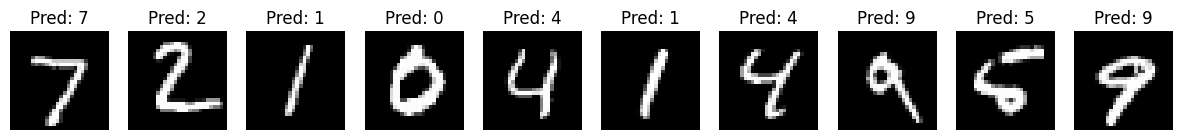

In [23]:
# Display the first 10 test images with their predicted labels.
n_images = 10

plt.figure(figsize=(15, 4))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(X_test[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Pred: {predictions_rf[i]}")  # Set the title as the predicted label
    plt.axis('off')  # Hide axis ticks for clarity
plt.show()

##### Feed-Forward Neural Network (FFNN)

In [ ]:
# For FFNN, the input shape is (28, 28) since the model expects a 2D input that it will flatten.
classifier_nn = MnistClassifier(algorithm='nn', input_shape=(28, 28), num_classes=10)

In [25]:
# Train the FFNN model using the training and validation data.
# Here, we specify the number of epochs and the batch size.
classifier_nn.train(X_train, y_train, X_val, y_val, epochs=5, batch_size=64)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.8539 - loss: 0.5231
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.9558 - loss: 0.1553
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9704 - loss: 0.1042
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.9771 - loss: 0.0774
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9821 - loss: 0.0611
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
Validation Accuracy: 0.9775


In [26]:
# Predict labels on the test set using the FFNN model.
predictions_nn = classifier_nn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


In [27]:
# Evaluate the FFNN model's accuracy on the test set.
test_accuracy_nn = accuracy_score(y_test, predictions_nn)
print(f"FFNN Test Accuracy: {test_accuracy_nn:.4f}")

FFNN Test Accuracy: 0.9744


In [28]:
# Optionally, validate the model on the validation set separately.
val_accuracy_nn = classifier_nn.validate(X_val, y_val)
print(f"FFNN Validation Accuracy: {val_accuracy_nn:.4f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
FFNN Validation Accuracy: 0.9775


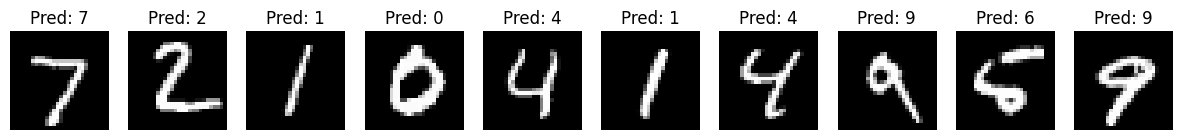

In [29]:
n_images = 10
plt.figure(figsize=(15, 4))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions_nn[i]}")
    plt.axis('off')
plt.show()

##### Convolutional Neural Network (CNN)

In [ ]:
# For CNN, the input shape is (28, 28, 1) to include the single channel for grayscale images.
classifier_cnn = MnistClassifier(algorithm='cnn', input_shape=(28, 28, 1), num_classes=10)

In [31]:
# Train the CNN model using the training and validation data.
# You can adjust the number of epochs and batch size as needed.
classifier_cnn.train(X_train, y_train, X_val, y_val, epochs=5, batch_size=64)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8873 - loss: 0.3839
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9818 - loss: 0.0571
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9897 - loss: 0.0336
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0228
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9945 - loss: 0.0178
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation Accuracy: 0.9882


In [32]:
# Predict labels on the test set using the CNN model.
predictions_cnn = classifier_cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [33]:
# Evaluate the CNN model's accuracy on the test set.
test_accuracy_cnn = accuracy_score(y_test, predictions_cnn)
print(f"CNN Test Accuracy: {test_accuracy_cnn:.4f}")

CNN Test Accuracy: 0.9885


In [34]:
# Optionally, validate the model on the validation set separately.
val_accuracy_cnn = classifier_cnn.validate(X_val, y_val)
print(f"CNN Validation Accuracy: {val_accuracy_cnn:.4f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CNN Validation Accuracy: 0.9882


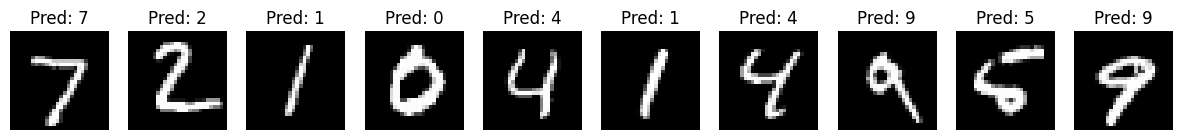

In [35]:
n_images = 10
plt.figure(figsize=(15, 4))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions_cnn[i]}")
    plt.axis('off')
plt.show()